In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 
from sklearn.model_selection import train_test_split
from IPython.display import  clear_output

## import the file 

In [2]:
loan = pd.read_excel('loan_approval_data.xlsx')

In [3]:
loan

,education,self_employed,loan_amount,cibil_score,commercial_assets_value,loan_status
0,1,0,29900000,778,17600000,1
1,0,1,12200000,417,2200000,0
2,1,0,29700000,506,4500000,0
3,1,0,30700000,467,3300000,0
4,0,1,24200000,382,8200000,0
...,...,...,...,...,...,...
4264,1,1,2300000,317,500000,0
4265,0,1,11300000,559,2900000,1
4266,0,0,23900000,457,12400000,0
4267,0,0,12800000,780,700000,1


# find the correlation in order to drop columns that are not needed

In [4]:
# before now i took the file to excel, to remove the unwanted columns, so these are the columns we will be working with
loan.corr()

,education,self_employed,loan_amount,cibil_score,commercial_assets_value,loan_status
education,1.000000,-0.023224,0.010631,-0.004649,-0.006763,0.004918
self_employed,-0.023224,1.000000,0.001450,-0.004866,-0.017998,0.000345
loan_amount,0.010631,0.001450,1.000000,-0.017035,0.603188,0.016150
cibil_score,-0.004649,-0.004866,-0.017035,1.000000,-0.003769,0.770518
commercial_assets_value,-0.006763,-0.017998,0.603188,-0.003769,1.000000,0.008246
loan_status,0.004918,0.000345,0.016150,0.770518,0.008246,1.000000


## divide the dataset into inputs and target values

In [5]:
# inputs = loan['loan_id','education','self_employed','loan_amount','cibil_score','commercial_assets_value']
inputs = loan.drop(' loan_status',axis= 'columns')
target = loan[' loan_status']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

## Bringing in our Decision tree model

In [7]:
tmodel = tree.DecisionTreeClassifier()

In [8]:
# fit the model on the training set
tmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Make predictions on the test set
y_pred = tmodel.predict(X_test)

In [10]:
tmodel.score(inputs,target)

0.9845397048489107

## creating a function to take inputs and use the algorithm to make a decision

In [12]:

x1 = float(input('enter the education:')) 
x2 = float(input('enter the self_employed:'))
x3 = float(input('enter the loan_amount:'))
x4 = float(input('enter the cibil_score:'))
x5 = float(input('enter the commercial_assets_value:'))
def pred(a,b,c,d,e):
    # clear screenab
    clear_output(wait=True)
    value = [[a,b,c,d,e]]
    return tmodel.predict(value)
ans = pred(x1,x2,x3,x4,x5)
clear_output(wait=True)
# using an if statement to tell the user if their loan is approved or not.
if ans == [1] :
    print(f'your loan status is: Approved')

else: 
   print(f'your loan status is: Denied')


your loan status is: Approved


Accuracy Score: 0.92

Confusion Matrix:
[[285  33]
 [ 33 503]]


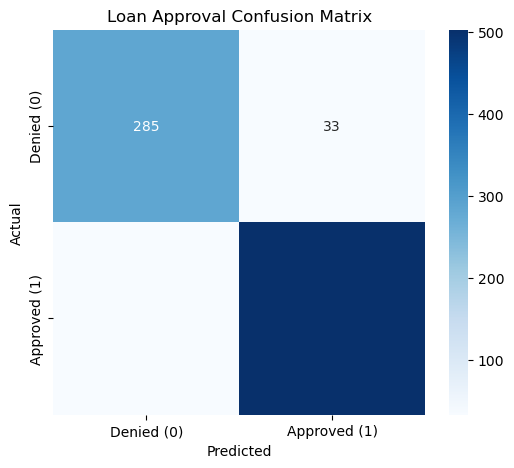

In [14]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix with better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Denied (0)', 'Approved (1)'], 
            yticklabels=['Denied (0)', 'Approved (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Loan Approval Confusion Matrix')
plt.show()

## Plotting the decission tree

[Text(0.7624172185430463, 0.9583333333333334, 'x[3] <= 549.5\ngini = 0.47082\nsamples = 3415\nvalue = [1295, 2120]\nclass = Loan denied'),
 Text(0.5874172185430464, 0.875, 'x[2] <= 26150000.0\ngini = 0.18645\nsamples = 1432\nvalue = [1283, 149]\nclass = Loan approved'),
 Text(0.3885761589403974, 0.7916666666666666, 'x[4] <= 4150000.0\ngini = 0.16106\nsamples = 1234\nvalue = [1125, 109]\nclass = Loan approved'),
 Text(0.2281456953642384, 0.7083333333333334, 'x[4] <= 2850000.0\ngini = 0.19212\nsamples = 706\nvalue = [630, 76]\nclass = Loan approved'),
 Text(0.09072847682119205, 0.625, 'x[4] <= 150000.0\ngini = 0.17802\nsamples = 567\nvalue = [511, 56]\nclass = Loan approved'),
 Text(0.02384105960264901, 0.5416666666666666, 'x[3] <= 545.0\ngini = 0.2649\nsamples = 70\nvalue = [59, 11]\nclass = Loan approved'),
 Text(0.018543046357615896, 0.4583333333333333, 'x[3] <= 354.0\ngini = 0.24785\nsamples = 69\nvalue = [59, 10]\nclass = Loan approved'),
 Text(0.013245033112582781, 0.375, 'gini = 0

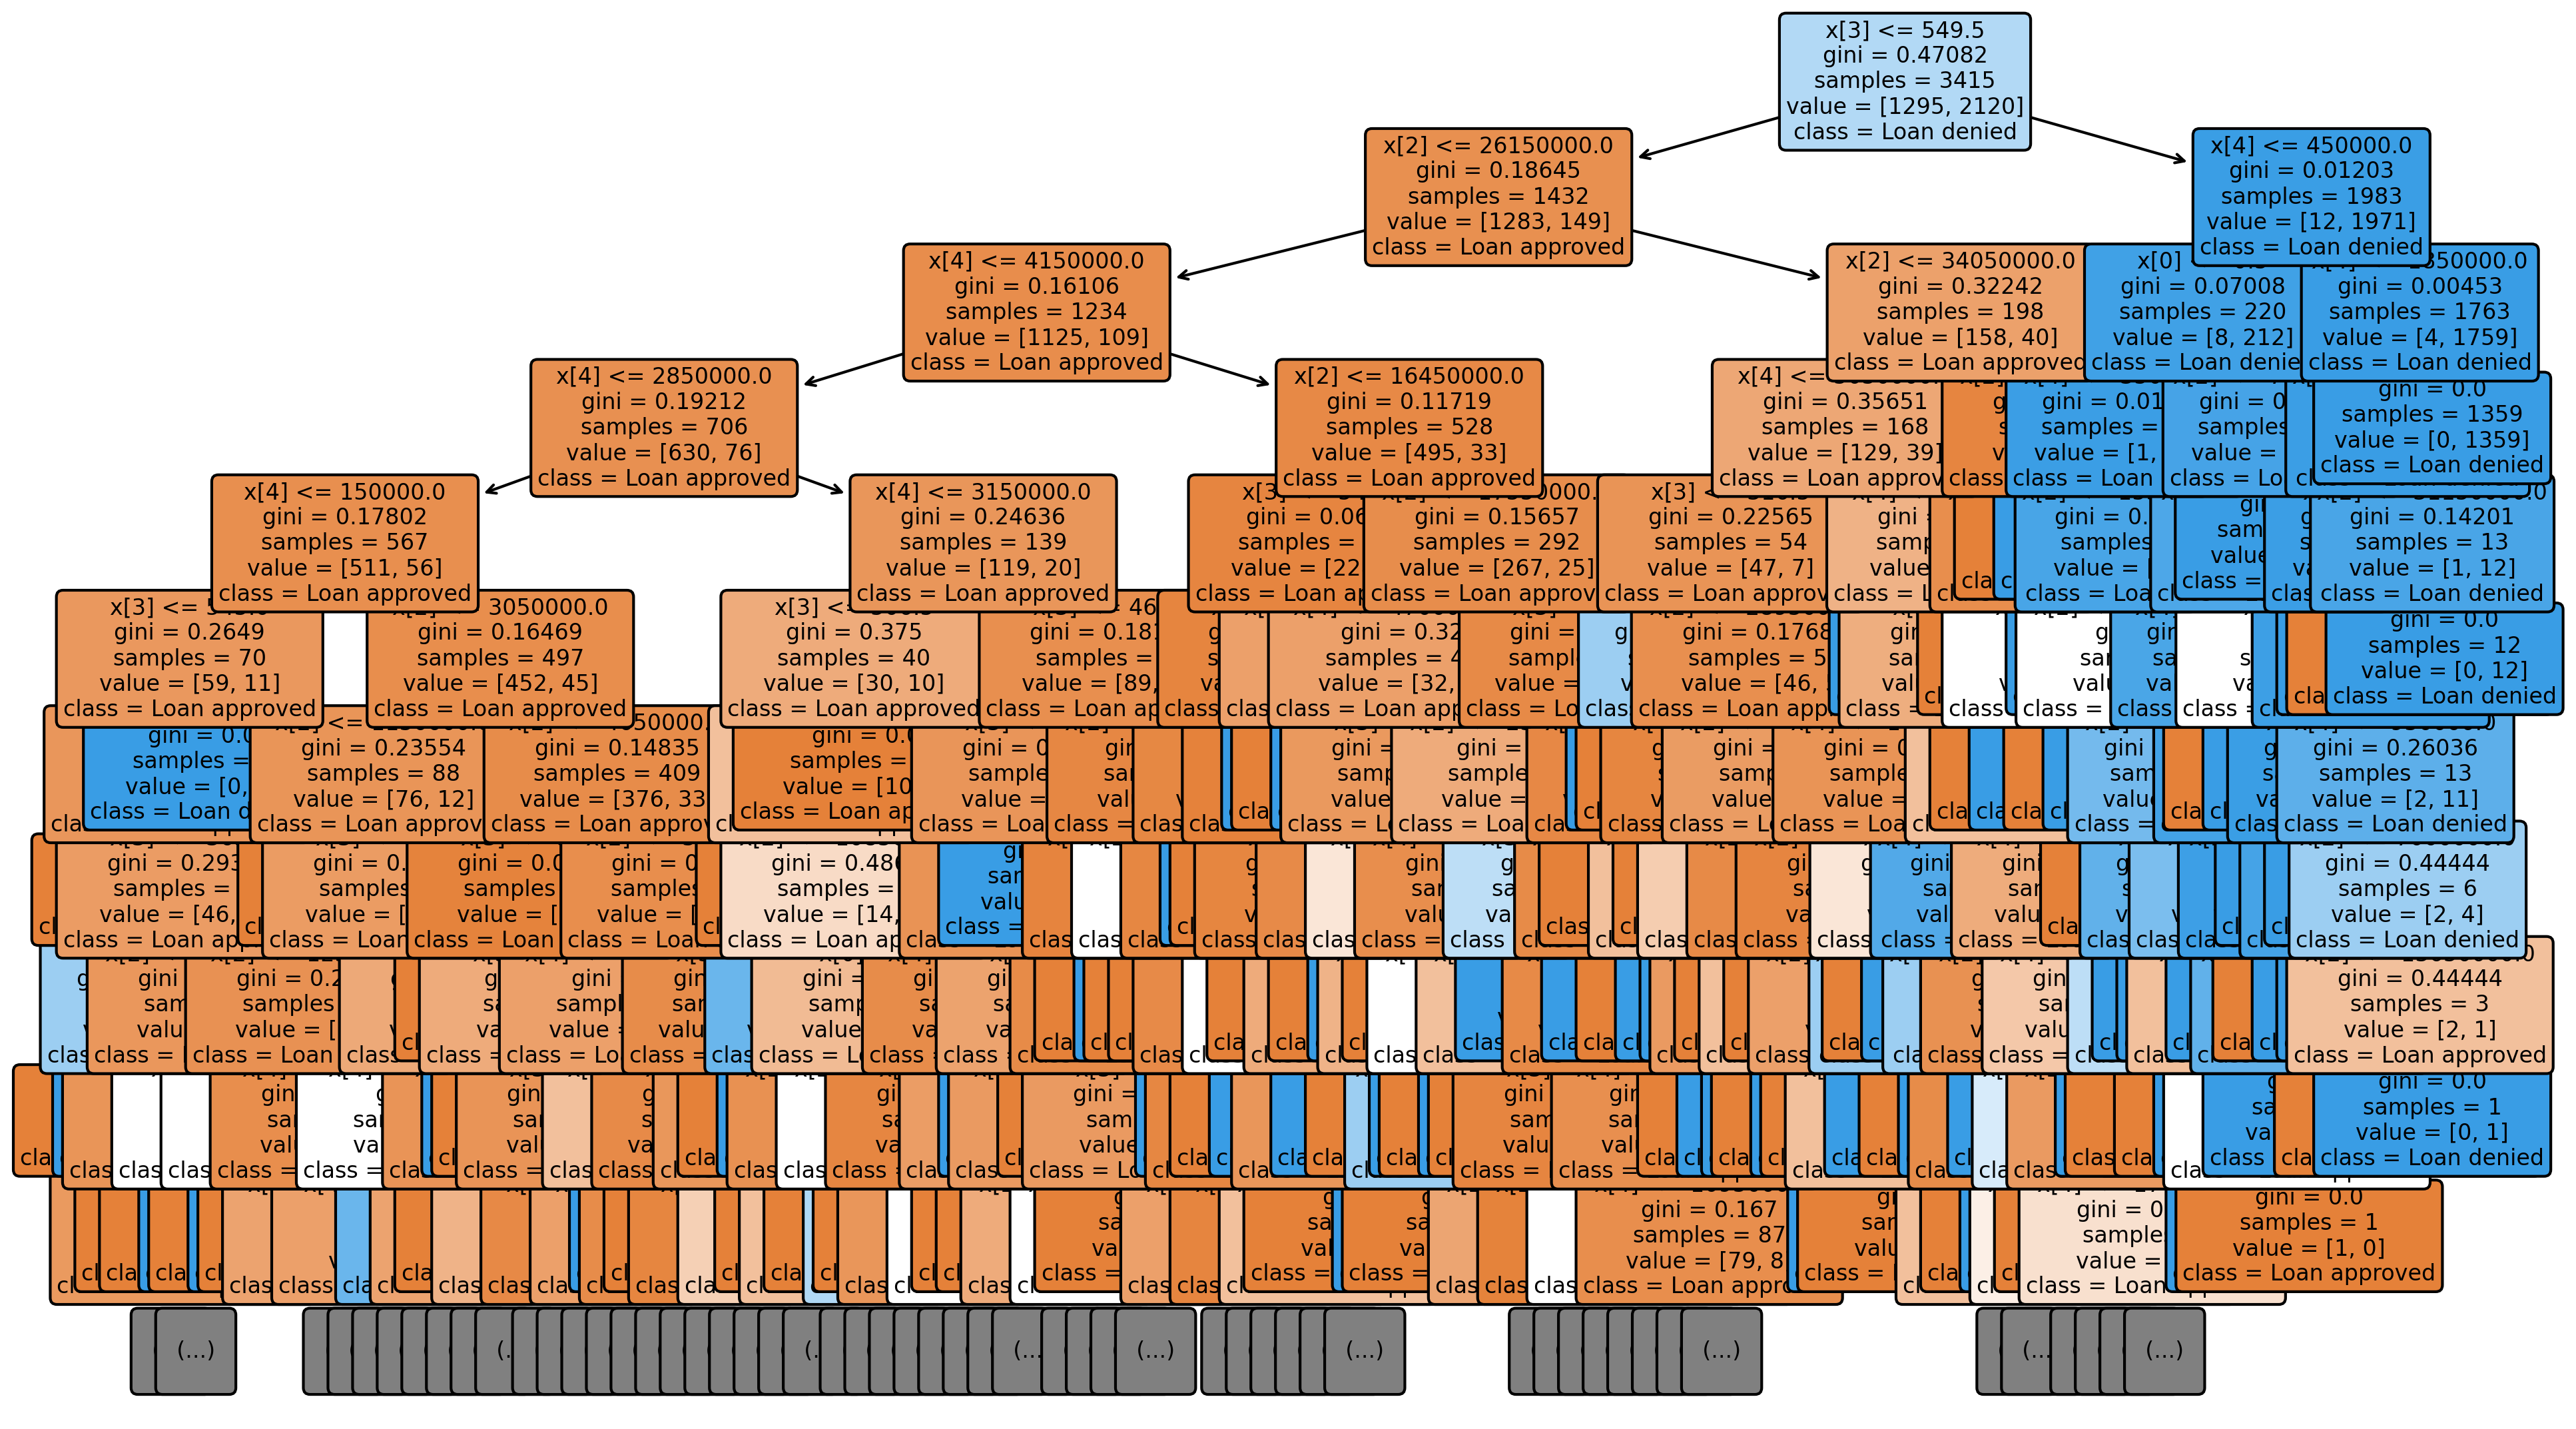

In [15]:
plt.figure(figsize=(15,9), dpi= 300)
tree.plot_tree(tmodel,filled=True,impurity=True,label='all',rounded=True,precision=5, fontsize=8,class_names=['Loan approved','Loan denied'],max_depth = 10)
